<a href="https://colab.research.google.com/github/lazarust/JupyterNotebooks/blob/goodreads/Goodreads/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goodreads 📖

In [2]:
# Install Kaggle
!pip install --quiet kaggle

## Download Data

### Upload Kaggle API Key

In [ ]:
from google.colab import files
files.upload()

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Check the file in its new directory
!ls /root/.kaggle/
# Check the file permission
!ls -l ~/.kaggle/kaggle.json
#Change the file permission
# chmod 600 file – owner can read and write
# chmod 700 file – owner can read, write and execute
!chmod 600 ~/.kaggle/kaggle.json

kaggle.json
-rw-r--r-- 1 root root 69 Nov 14 21:33 /root/.kaggle/kaggle.json


### Get Data

In [5]:
!kaggle datasets download -d jealousleopard/goodreadsbooks

  0% 0.00/622k [00:00<?, ?B/s]
100% 622k/622k [00:00<00:00, 20.6MB/s]


In [6]:
!mkdir dataset
!unzip goodreadsbooks.zip -d dataset

Archive:  goodreadsbooks.zip
  inflating: dataset/books.csv       


## Imports

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('dataset/books.csv', error_bad_lines=False)

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


## EDA

In [8]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [9]:
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


### Average Rating

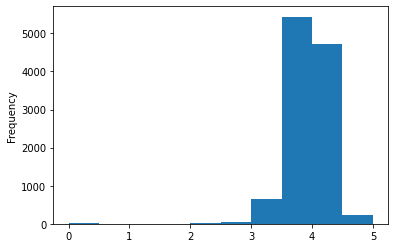

In [10]:
df['average_rating'].plot.hist()

In [18]:
df['average_rating'].describe()

count    11123.000000
mean         3.934075
std          0.350485
min          0.000000
25%          3.770000
50%          3.960000
75%          4.140000
max          5.000000
Name: average_rating, dtype: float64

### Num Pages

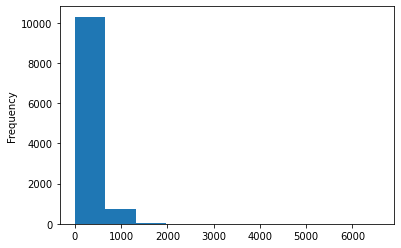

In [13]:
df.rename(columns={'  num_pages': 'num_pages'}, inplace=True)
df['num_pages'].plot.hist()

In [17]:
df['num_pages'].describe()

count    11123.000000
mean       336.405556
std        241.152626
min          0.000000
25%        192.000000
50%        299.000000
75%        416.000000
max       6576.000000
Name: num_pages, dtype: float64

### Text Reviews Count

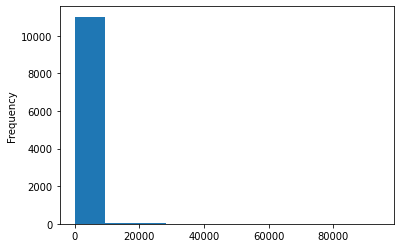

In [19]:
df['text_reviews_count'].plot.hist()

In [20]:
df['text_reviews_count'].describe()

count    11123.000000
mean       542.048099
std       2576.619589
min          0.000000
25%          9.000000
50%         47.000000
75%        238.000000
max      94265.000000
Name: text_reviews_count, dtype: float64

### Ratings Count

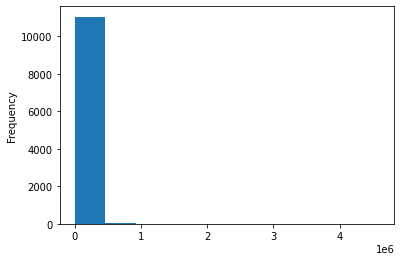

In [21]:
df['ratings_count'].plot.hist()

In [22]:
df['ratings_count'].describe()

count    1.112300e+04
mean     1.794285e+04
std      1.124992e+05
min      0.000000e+00
25%      1.040000e+02
50%      7.450000e+02
75%      5.000500e+03
max      4.597666e+06
Name: ratings_count, dtype: float64

### Language Code

In [23]:
df['language_code'].unique()

array(['eng', 'en-US', 'fre', 'spa', 'en-GB', 'mul', 'grc', 'enm',
       'en-CA', 'ger', 'jpn', 'ara', 'nl', 'zho', 'lat', 'por', 'srp',
       'ita', 'rus', 'msa', 'glg', 'wel', 'swe', 'nor', 'tur', 'gla',
       'ale'], dtype=object)

In [26]:
lang_code_map = {}
i = 0
for code in df['language_code'].unique():
  lang_code_map[code] = i
  i += 1

print(lang_code_map)

{'eng': 0, 'en-US': 1, 'fre': 2, 'spa': 3, 'en-GB': 4, 'mul': 5, 'grc': 6, 'enm': 7, 'en-CA': 8, 'ger': 9, 'jpn': 10, 'ara': 11, 'nl': 12, 'zho': 13, 'lat': 14, 'por': 15, 'srp': 16, 'ita': 17, 'rus': 18, 'msa': 19, 'glg': 20, 'wel': 21, 'swe': 22, 'nor': 23, 'tur': 24, 'gla': 25, 'ale': 26}


In [29]:
df['language_code'] = df['language_code'].map(lang_code_map)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,NaN,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,NaN,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,NaN,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,NaN,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,NaN,2690,41428,164,9/13/2004,Scholastic
